In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [38]:
image = cv2.imread('/Users/jsw/Desktop/VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg', cv2.IMREAD_COLOR)

In [39]:
if image is None:
    raise Exception('영상파일 읽기 오류')

In [40]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)

(281, 500, 3)


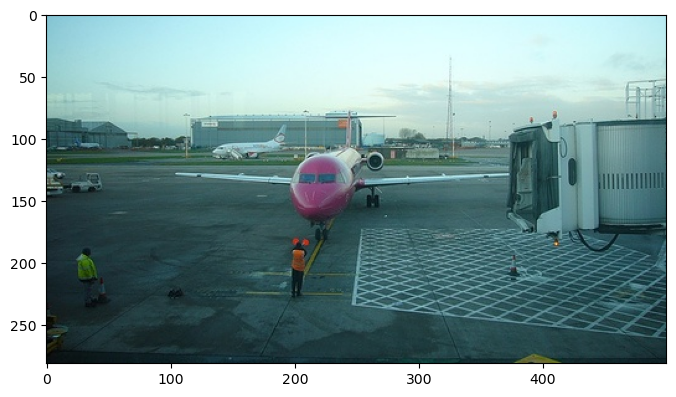

In [41]:
plt.figure(figsize = (8,8))
plt.imshow(image_rgb)
plt.show()

In [42]:
!cat /Users/jsw/Desktop/VOCdevkit/VOC2012/Annotations/2007_000032.xml
#cat 명령어 : 리눅스에서 텍스트파일을 화면에 출력할 때 사용하는 명령어.

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000032.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>281</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>aeroplane</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>104</xmin>
			<ymin>78</ymin>
			<xmax>375</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>aeroplane</name>
		<pose>Left</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>133</xmin>
			<ymin>88</ymin>
			<xmax>197</xmax>
			<ymax>123</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>195</xmin>
			<ymin>180</ymin>
			<xmax>213</xmax>
			<ymax>229</ymax>
		</bndbox>
	</object>
	<object>
		<name>p

In [43]:
image_seg = cv2.imread('/Users/jsw/Desktop/VOCdevkit/VOC2012/SegmentationObject/2007_000032.png')

In [44]:
image_seg_rgb = cv2.cvtColor(image_seg, cv2.COLOR_BGR2RGB)

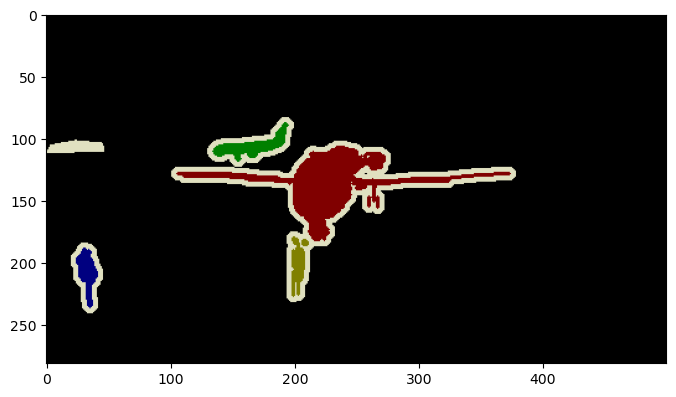

In [45]:
plt.figure(figsize = (8,8))
plt.imshow(image_seg_rgb)
plt.show()

In [66]:
#Parsing
#데이터를 조립해 원하는 데이터를 빼내는 프로그램을 하는것
#컴퓨터 과학에서 parsing은 일련의 문자열을 의미있는 token(어휘 분석의 단위) 으로 분해하고 그것들로 이루어진 
#Parse tree를 만드는 과정
#어떤 문장을 분석하거나 문법적 관계를 해석하는 행위

In [46]:
import os
import random
import xml.etree.ElementTree as ET

In [47]:
voc_root_dir = '/Users/jsw/Desktop/VOCdevkit/VOC2012/'
annotation_root_dir = os.path.join(voc_root_dir,'Annotations')
image_root_dir = os.path.join(voc_root_dir, 'JPEGImages')

In [67]:
xml_files = os.listdir(annotation_root_dir)
#os.listdir 디렉토리에 있는 모든 하위 디렉토리 나열
print(xml_files[:5])
print(len(xml_files))

['2011_006135.xml', '2008_006482.xml', '2010_005054.xml', '2010_005732.xml', '2011_004044.xml']
17125


In [49]:
xml_file = os.path.join(annotation_root_dir, '2007_000032.xml')

In [50]:
#xml파일을 parsing하여 Element 생성
tree = ET.parse(xml_file)
root = tree.getroot()

In [68]:
tree

In [69]:
root

<Element 'annotation' at 0x15a2f59e0>

In [51]:
root.tag

'annotation'

In [52]:
image_name = root.find('filename').text
#filename이라는 노드를 찾는다. text를 붙여야 이름을 도출.
full_image_name = os.path.join(image_root_dir,'image_name')
image_size = root.find('size')
image_width = int(image_size.find('width').text)
image_height = int(image_size.find('height').text)
#size 노드를 찾고, 그 밑의 너비와 높이를 찾음. 숫자형으로 바꿔줌.

In [53]:
object_list = []
#여러개를 다찾아라 findall. loop돌리면 모든 object 나옴.
for i in root.findall('object'):
    xmlbox = i.find('bndbox')
    x1 = int(xmlbox.find('xmin').text)
    y1 = int(xmlbox.find('ymin').text)
    x2 = int(xmlbox.find('xmax').text)
    y2 = int(xmlbox.find('ymax').text)
    
    bndbox_pos = (x1,y1,x2,y2)
    class_name = i.find('name').text
    object_dict = {'class_name' : class_name, 'bndbox_pos' : bndbox_pos}
    object_list.append(object_dict)

In [54]:
print('full image name : ', full_image_name, '\n', 'image size : ', (image_width, image_height))

full image name :  /Users/jsw/Desktop/VOCdevkit/VOC2012/JPEGImages/image_name 
 image size :  (500, 281)


In [55]:
for object in object_list:
    print(object)

{'class_name': 'aeroplane', 'bndbox_pos': (104, 78, 375, 183)}
{'class_name': 'aeroplane', 'bndbox_pos': (133, 88, 197, 123)}
{'class_name': 'person', 'bndbox_pos': (195, 180, 213, 229)}
{'class_name': 'person', 'bndbox_pos': (26, 189, 44, 238)}


In [58]:
xml_file = os.path.join(annotation_root_dir, '2007_000032.xml')

In [60]:
image_name = root.find('filename').text
full_image_name = os.path.join(image_root_dir, image_name)

In [61]:
img = cv2.imread(full_image_name)

In [62]:
b, g, r = (255, 0, 0), (0, 255, 0), (0, 0, 255)

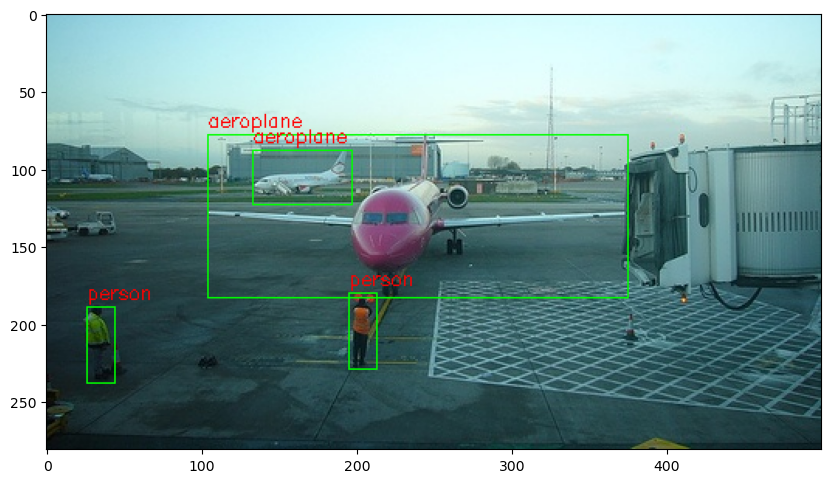

In [65]:
objects_list = []
for obj in root.findall('object'):
    xmlbox = obj.find('bndbox')
    
    left = int(xmlbox.find('xmin').text)
    top = int(xmlbox.find('ymin').text)
    right = int(xmlbox.find('xmax').text)
    bottom = int(xmlbox.find('ymax').text)
    
    class_name=obj.find('name').text
    
    # draw_img 배열의 좌상단 우하단 좌표에 녹색으로 box 표시 
    cv2.rectangle(img, (left, top), (right, bottom), g, thickness=1)
    # draw_img 배열의 좌상단 좌표에 빨간색으로 클래스명 표시
    cv2.putText(img, class_name, (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, r, thickness=1)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)